In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import select

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Create the inspector and connect it to the engine
#inspector = inspect(engine)

# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
 # Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
 # Assign the demographics class to a variable called `Demographics`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#SELECT Max(date) from Measurement GROUP BY date



result = session.query(func.max(Measurement.date))

for record in result:
    max_date =record[0]
print(max_date)

    #print(Measurement.id, measurement.station


2017-08-23


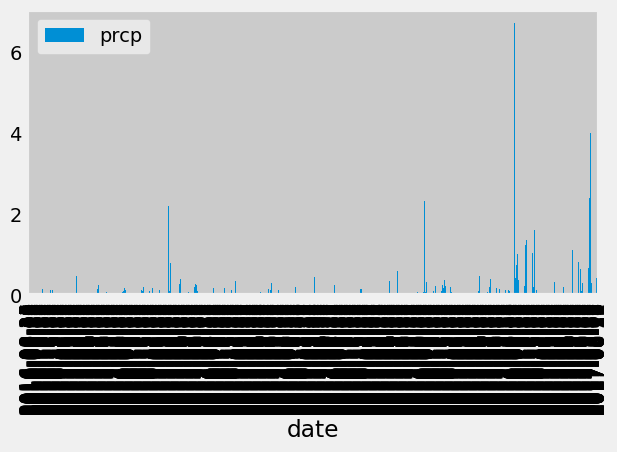

In [12]:
from datetime import timedelta, datetime
get_year = datetime.strptime(max_date, "%Y-%m-%d")
year_date = get_year - timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_date)
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show() 

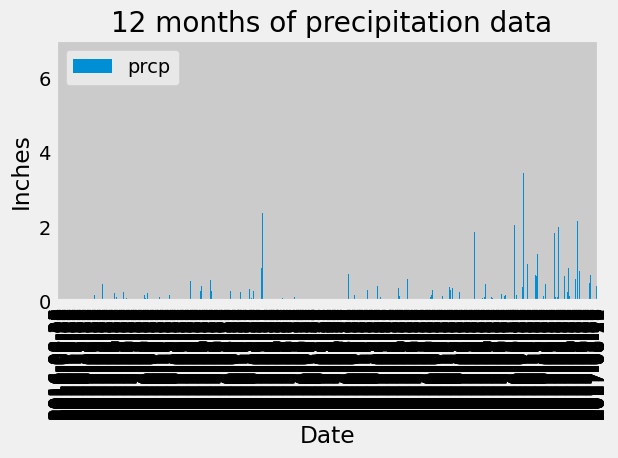

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# SELECT * from Measurements where Measurements.date in (Select Max(Date) from Measurements)
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
from datetime import timedelta, datetime
get_year = datetime.strptime(max_date, "%Y-%m-%d")
year_date = get_year - timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
 # Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title(' 12 months of precipitation data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
results = session.query(Measurement.station).group_by(Measurement.station).count()
results


9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import asc, desc
results =session.query(Measurement.station, func.count(Measurement.station).label("StationCount")).group_by(Measurement.station).order_by(desc('StationCount')).all()
for record in results:
    print(record)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mylist = []
results =session.query(Measurement.station, func.count(Measurement.station).label("StationCount")).group_by(Measurement.station).order_by(desc('StationCount')).first()
for record in results:
    #print(record,type(record))
    #print(station_name)
    mylist.append(record)
#print(f'{mylist[0]}')
active_station= mylist[0]
results = session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.station == active_station)
for record in results:
    print(record)

    
#print(active_date)


('USC00519281', 54.0, 85.0, 71.66378066378067)


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

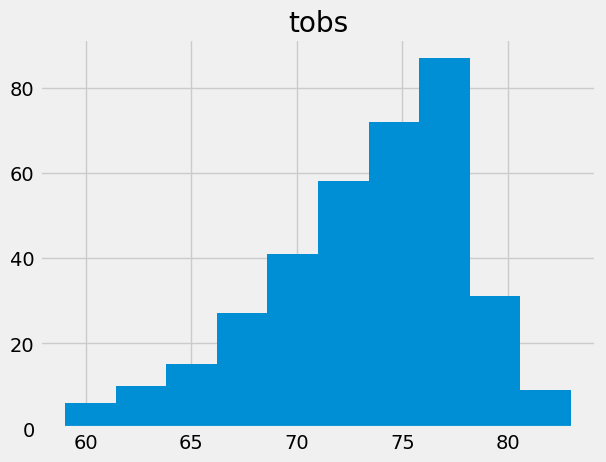

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_date =''
result = session.query(func.max(Measurement.date)).group_by(Measurement.station).filter(Measurement.station == active_station)
for record in result:
    active_date = record[0]

from datetime import timedelta, datetime
get_year = datetime.strptime(active_date, "%Y-%m-%d")
year_date = get_year - timedelta(days = 365)
#print(year_date)
results = session.query(Measurement.tobs).filter(Measurement.station == active_station).filter(Measurement.date>=year_date)
df = pd.DataFrame(results)
df.dropna(axis=1, how='all', inplace=True)
df.hist(column='tobs')





# Close Session

In [ ]:
# Close Session
session.close()